In [2]:
import cv2
import numpy as np


### 窗口创建和销毁

In [18]:
# 创建窗口
cv2.namedWindow('window', flags=cv2.WINDOW_NORMAL)
# 更改窗口的大小
# cv2.resize('window',dsize=(800,600))
# 展示name为window的窗口
cv2.imshow('window',0)
# 0表示任意按键，其它整数表示等待按键的时间，单位ms
key=cv2.waitKey(0)
# key是int，最少16位置，ascii是8位，把key的最后8位取出来（用于C）
if key & 0xFF == ord('q'):
    cv2.destroyAllWindows()

# 读取图片

In [8]:
import matplotlib.pyplot as plt

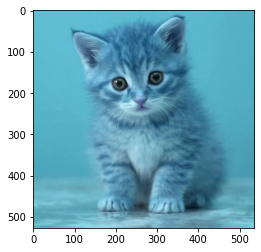

In [13]:
cat = cv2.imread('cat.png')

# 发现matplotlib的通道顺序和opencv不一样
# opencv -> BGR
# matplotlib -> RGB
plt.imshow(cat)

In [15]:
cv2.imshow('cat', cat)
key=cv2.waitKey(0)
# key是int，最少16位置，ascii是8位，把key的最后8位取出来（用于C）
if key & 0xFF == ord('q'):
    cv2.destroyAllWindows()

In [16]:
# @utils.py 方便以后重用
# def cv_show(name, img):
#     cv2.imshow(name, img)
#     if cv2.waitKey(0 )& 0xFF == ord('q'):
#         cv2.destroyAllWindows()

In [18]:
%run utils.py

# 保存图片
+ imwrite(path, img)

In [28]:
cv2.namedWindow('img', cv2.WINDOW_NORMAL)

img = cv2.imread('cat.png')
while True:
    cv2.imshow('img', img)
    key = cv2.waitKey(0)
    if key == ord('q'):
        break
    elif key==ord('s'):
        print('保存成功！')
        cv2.imwrite('123.png', img)
    else:
        raise KeyError(f'{key} is invalid')
cv2.destroyAllWindows()

### 视频采集

In [3]:
from utils import cv_show

# 打开视频文件，VideoCapture如果打开失败，没有读取到，不会报错
# vc = cv2.VideoCapture('1.mp4')

# 打开摄像头
cv2.namedWindow('video', cv2.WINDOW_AUTOSIZE)
cap = cv2.VideoCapture(0)
while cap.isOpened():
    # 读取每一帧，返回成功标志和帧
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow('video', frame)
    key = cv2.waitKey(10) # 每间隔10ms，读取下一帧
    #  如果一个视频是30帧，那么每张图片需要间隔1000//30。而且要是整数
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

###  视频录制
+ VideoWriter: 参数一位输出文件，参数二为多媒体文件格式(VideoWriter_fourcc)，参数三帧率，参数四分辨率
+ write编码并写入缓存
+ release缓存内容写入磁盘，并释放资源

In [20]:
cap = cv2.VideoCapture(0)
# *mp4v就是解包操作 等同于  'm', 'p', '4', 'v'
# 也可以用*’XVID‘代表avi
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# (640, 480)表示摄像头拍视频, 这个大小搞错了也不行.
# 主要是这个分辨率.帧率无所谓
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'开始录制视频，({width}*{height}), {fps} fps.')

vw = cv2.VideoWriter('output.mp4', fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('can not recive frame, Exiting...')
        break

    vw.write(frame)
    cv2.imshow('frame', frame)

    if cv2.waitKey(int(1000/fps)) == ord('q'):
        break

cap.release()
vw.release()
cv2.destroyAllWindows()


开始录制视频，(640*480), 30.0 fps.


### 控制鼠标
OpenCV允许我们对窗口上的鼠标动作做出响应.

+ setMouseCallback(winname, callback, userdata) winname是窗口的名字, callback是回调函数, userdata是给回调函数的参数.
+ callback(event, x, y, flags, userdata)回调函数必须包含这5个参数. event是事件(鼠标移动, 左键, 右键等), x,y是点鼠标的坐标点, flags主要用于组合键, userdata就是上面的setMouseCallback的userdata

鼠标事件:

+ EVENT_MOUSEMOVE 0 鼠标移动
+ EVENT_LBUTTONDOWN 1 按下鼠标左键
+ EVENT_RBUTTONDOWN 2 按下鼠标右键
+ EVENT_MBUTTONDOWN 3 按下鼠标中键
+ EVENT_LBUTTONUP 4 左键释放
+ EVENT_RBUTTONUP 5 右键释放
+ EVENT_MBUTTONUP 6 中键释放
+ EVENT_LBUTTONDBLCLK 7 左键双击
+ EVENT_RBUTTONDBLCLK 8 右键双击
+ EVENT_MBUTTONDBLCLK 9 中键双击
+ EVENT_MOUSEWHEEL 10 鼠标滚轮上下滚动
+ EVENT_MOUSEHWHEEL 11 鼠标左右滚动

flags:

+ EVENT_FLAG_LBUTTON 1 按下左键
+ EVENT_FLAG_RBUTTON 2 按下右键
+ EVENT_FLAG_MBUTTON 4 按下中键
+ EVENT_FLAG_CRTLKEY 8 按下ctrl键
+ EVENT_FLAG_SHIFTKEY 16 按下shift键
+ EVENT_FLAG_ALTKEY 32 按下alt键

In [25]:
import numpy as np
# 名字可以随便取，但是参数一定要有5个
# 事件名称，光标位置，鼠标组合按键，传递的数据
def mouse_callback(event, x, y, flags, userdata):
    print(f'eventType={event}, (x,y)={x,y}, flags={flags}, userdata={userdata}')
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.destroyAllWindows()
cv2.namedWindow('mouse', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('mouse',mouse_callback,'数据123')

img = np.zeros(( height, width,3), dtype=np.int8)
while True:
    cv2.imshow('mouse', img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()


event=0, (x,y)=(627, 302), flags=0,userdata=数据123
event=0, (x,y)=(627, 321), flags=0,userdata=数据123
event=0, (x,y)=(627, 321), flags=0,userdata=数据123
event=0, (x,y)=(632, 330), flags=0,userdata=数据123
event=0, (x,y)=(623, 43), flags=0,userdata=数据123
event=0, (x,y)=(526, 43), flags=0,userdata=数据123
event=0, (x,y)=(457, 50), flags=0,userdata=数据123
event=0, (x,y)=(406, 61), flags=0,userdata=数据123
event=0, (x,y)=(389, 70), flags=0,userdata=数据123
event=0, (x,y)=(381, 75), flags=0,userdata=数据123
event=0, (x,y)=(375, 80), flags=0,userdata=数据123
event=0, (x,y)=(368, 84), flags=0,userdata=数据123
event=0, (x,y)=(366, 85), flags=0,userdata=数据123
event=0, (x,y)=(364, 87), flags=0,userdata=数据123
event=0, (x,y)=(352, 94), flags=0,userdata=数据123
event=0, (x,y)=(341, 99), flags=0,userdata=数据123
event=0, (x,y)=(326, 104), flags=0,userdata=数据123
event=0, (x,y)=(320, 108), flags=0,userdata=数据123
event=0, (x,y)=(307, 114), flags=0,userdata=数据123
event=0, (x,y)=(295, 120), flags=0,userdata=数据123
event=0, (x,

### trackBar控件
+ createTrackbar(trackbarname, winname, value, count, onChange) 创建TrackBar控件, value为trackbar的默认值, count为bar的最大值, 最小为0
+ getTrackbarPos(trackbarname, winname) 获取TrackBar当前值

In [29]:
cv2.namedWindow('trackbar', cv2.WINDOW_NORMAL)
def callback(value):
    print(value)

cv2.createTrackbar('R', 'trackbar', 0, 255, callback)
cv2.createTrackbar('G', 'trackbar', 0, 255, callback)
cv2.createTrackbar('B', 'trackbar', 0, 255, callback)
# 创建一个背景图片 img = np.zeros((480,640,3), np.uint8)
img = np.zeros((480,640,3), np.uint8)

while True:
    r = cv2.getTrackbarPos('R', 'trackbar')
    g = cv2.getTrackbarPos('G', 'trackbar')
    b = cv2.getTrackbarPos('B', 'trackbar')
    img[:] = [b, g, r]
    print(img.shape)
    cv2.imshow('trackbar', img)
    if cv2.waitKey(1) == ord('q'):
        break
cv2.destroyAllWindows()

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 